In [1]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [4]:
import tensorflow as tf

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode="categorical", image_size=(224, 224), batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode="categorical", image_size=(224, 224), batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
for images, labels in train_data.take(1):  
    print(images.shape, labels.shape)

(32, 224, 224, 3) (32, 10)


In [8]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

In [9]:
base_model.trainable = False

In [19]:
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, None,      │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, None,      │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, None,      │          0 │ normalization_1[… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, None,      │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ stem_conv_pad[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, None,      │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, None,      │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, None,      │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, None,      │          0 │ block1a_activati… │
│ (Multiply)          │ None, 32)         │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [10]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model1 = tf.keras.Model(inputs, outputs)

model1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [11]:
history = model1.fit(train_data, epochs=5, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data))

Epoch 1/5


I0000 00:00:1738745653.895351    5399 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1738745665.529537    5399 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2416 - loss: 2.1488 - val_accuracy: 0.7216 - val_loss: 1.3233
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7419 - loss: 1.2196 - val_accuracy: 0.8172 - val_loss: 0.8738
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8253 - loss: 0.8095 - val_accuracy: 0.8392 - val_loss: 0.6968
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.8698 - loss: 0.6482 - val_accuracy: 0.8540 - val_loss: 0.6052
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.8936 - loss: 0.5298 - val_accuracy: 0.8584 - val_loss: 0.5495


In [12]:
import pandas as pd

<Axes: >

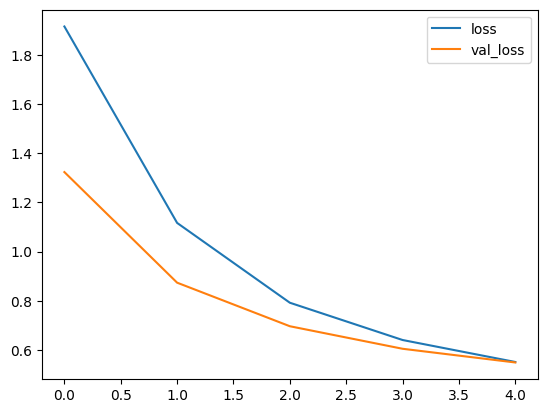

In [13]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [14]:
model1.evaluate(test_data, steps=len(test_data))

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8590 - loss: 0.5383


[0.5494717955589294, 0.8583999872207642]

In [15]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_layer_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activa

In [22]:
base_model_full = tf.keras.applications.EfficientNetB0(include_top=True)

In [23]:
for layer_number, layer in enumerate(base_model_full.layers):
    print(layer_number, type(layer))

0 <class 'keras.src.layers.core.input_layer.InputLayer'>
1 <class 'keras.src.layers.preprocessing.rescaling.Rescaling'>
2 <class 'keras.src.layers.preprocessing.normalization.Normalization'>
3 <class 'keras.src.layers.preprocessing.rescaling.Rescaling'>
4 <class 'keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D'>
5 <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
6 <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
7 <class 'keras.src.layers.activations.activation.Activation'>
8 <class 'keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D'>
9 <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
10 <class 'keras.src.layers.activations.activation.Activation'>
11 <class 'keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D'>
12 <class 'keras.src.layers.reshaping.reshape.Reshape'>
13 <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
14 <class 'keras.src.layers.convolutional.conv2d.Conv2

In [24]:
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

In [25]:
import wget

In [26]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-02-05 11:29:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.215.91, 142.250.186.219, 172.217.16.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.215.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  30.6MB/s    in 5.6s    

2025-02-05 11:29:39 (22.8 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [27]:
import zipfile

In [28]:
zip_ref = zipfile.ZipFile("10_food_classes_1_percent.zip")

In [29]:
zip_ref.extractall()

In [31]:
train_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [33]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode="categorical", image_size=(224, 224), batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode="categorical", image_size=(224, 224), batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [37]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
])

In [100]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [42]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model2 = tf.keras.Model(inputs, outputs)

model2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history = model2.fit(train_data, epochs=20, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.0780 - loss: 2.3499 - val_accuracy: 0.1948 - val_loss: 2.2176
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2640 - loss: 2.1443 - val_accuracy: 0.2840 - val_loss: 2.0923
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4291 - loss: 1.9066 - val_accuracy: 0.3696 - val_loss: 1.9821
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4772 - loss: 1.8330 - val_accuracy: 0.4452 - val_loss: 1.8823
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5943 - loss: 1.6092 - val_accuracy: 0.5036 - val_loss: 1.7932
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7204 - loss: 1.4777 - val_accuracy: 0.5376 - val_loss: 1.7093
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7867 - loss: 1.4034 - val_accuracy: 0.5856 - val_loss: 1.6323
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8355 - loss: 1.3077 - val_accuracy: 0.6228 - val_loss: 1.5610
Epoch 9/20
3/3 

<Axes: >

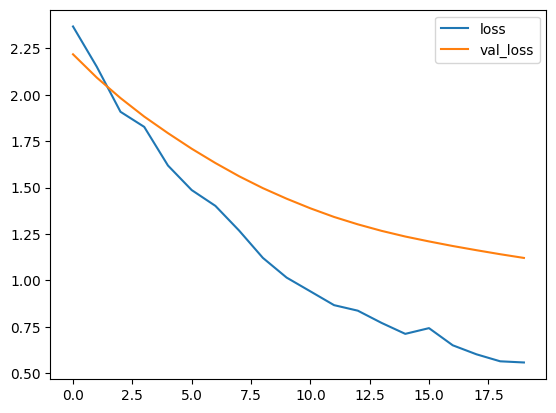

In [43]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [44]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [45]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode="categorical", image_size=(224, 224), batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode="categorical", image_size=(224, 224), batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [101]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model3 = tf.keras.Model(inputs, outputs)

model3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('checkpoints/epoch_{epoch:02d}.weights.h5', save_best_only=False, save_weights_only=True, save_freq="epoch", verbose=1)

history = model3.fit(train_data, epochs=20, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), callbacks=[checkpoint_callback])

Epoch 1/20


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2678 - loss: 2.1317
Epoch 1: saving model to checkpoints/epoch_01.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 375ms/step - accuracy: 0.2723 - loss: 2.1248 - val_accuracy: 0.6624 - val_loss: 1.4124
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6819 - loss: 1.3873
Epoch 2: saving model to checkpoints/epoch_02.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.6825 - loss: 1.3852 - val_accuracy: 0.7960 - val_loss: 0.9876
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7962 - loss: 1.0471
Epoch 3: saving model to checkpoints/epoch_03.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.7948 - loss: 1.0475 - val_accuracy: 0.8080 - val_loss: 0.7970
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7949 - loss: 0.8715
Epoch 4: saving model to checkpoints/epoch_04.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.7946 - loss: 0.8709 - val_accuracy

<Axes: >

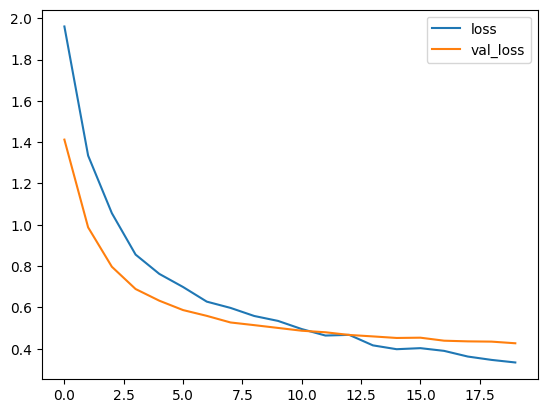

In [102]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [103]:
model3.evaluate(test_data, steps=len(test_data))

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8853 - loss: 0.4048


[0.4266100525856018, 0.8736000061035156]

In [104]:
model3.load_weights("checkpoints/epoch_19.weights.h5")

In [105]:
model3.evaluate(test_data, steps=len(test_data))

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8784 - loss: 0.4036


[0.4345471262931824, 0.868399977684021]

In [106]:
model3.load_weights("checkpoints/epoch_20.weights.h5")

In [107]:
model3.evaluate(test_data, steps=len(test_data))

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8859 - loss: 0.3975


[0.4266100525856018, 0.8736000061035156]

In [108]:
for layer in base_model.layers[-10:]:
    layer.trainable = True

In [109]:
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_layer_23 False
rescaling_11 False
normalization_5 False
rescaling_12 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False

In [110]:
model3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0001), metrics=["accuracy"])

history = model3.fit(train_data, epochs=30, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), initial_epoch=history.epoch[-1])

Epoch 20/30


E0000 00:00:1738778730.243345     747 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_14_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 381ms/step - accuracy: 0.8875 - loss: 0.4143 - val_accuracy: 0.8660 - val_loss: 0.4150
Epoch 21/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 291ms/step - accuracy: 0.9336 - loss: 0.3284 - val_accuracy: 0.8692 - val_loss: 0.4106
Epoch 22/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 291ms/step - accuracy: 0.9434 - loss: 0.2893 - val_accuracy: 0.8708 - val_loss: 0.4047
Epoch 23/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.9372 - loss: 0.2859 - val_accuracy: 0.8740 - val_loss: 0.3990
Epoch 24/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - accuracy: 0.9489 - loss: 0.2578 - val_accuracy: 0.8696 - val_loss: 0.3951
Epoch 25/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step - accuracy: 0.9460 - loss: 0.2298 - val_accuracy: 0.8736 - val_loss: 0.3907
Epoch 26/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.9597 - loss: 0.2227 - val_accuracy: 0.8752 - val_loss: 0.3839
Epoch 27/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - accuracy: 0.9405 - loss: 0.2353 - val_accuracy: 0.876

In [111]:
for layer in base_model.layers[-40:]:
    layer.trainable = True

In [112]:
model3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0001), metrics=["accuracy"])

history = model3.fit(train_data, epochs=40, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), initial_epoch=history.epoch[-1])

Epoch 30/40


E0000 00:00:1738778853.057289     747 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_14_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 431ms/step - accuracy: 0.8927 - loss: 0.5304 - val_accuracy: 0.8804 - val_loss: 0.3717
Epoch 31/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - accuracy: 0.9246 - loss: 0.3545 - val_accuracy: 0.8808 - val_loss: 0.3685
Epoch 32/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - accuracy: 0.9517 - loss: 0.2744 - val_accuracy: 0.8776 - val_loss: 0.3717
Epoch 33/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.9504 - loss: 0.2697 - val_accuracy: 0.8776 - val_loss: 0.3726
Epoch 34/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.9601 - loss: 0.2127 - val_accuracy: 0.8756 - val_loss: 0.3729
Epoch 35/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step - accuracy: 0.9758 - loss: 0.1803 - val_accuracy: 0.8780 - val_loss: 0.3684
Epoch 36/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step - accuracy: 0.9723 - loss: 0.1602 - val_accuracy: 0.8780 - val_loss: 0.3665
Epoch 37/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.9831 - loss: 0.1280 - val_accuracy: 0.880

In [113]:
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_layer_23 False
rescaling_11 False
normalization_5 False
rescaling_12 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False

<Axes: >

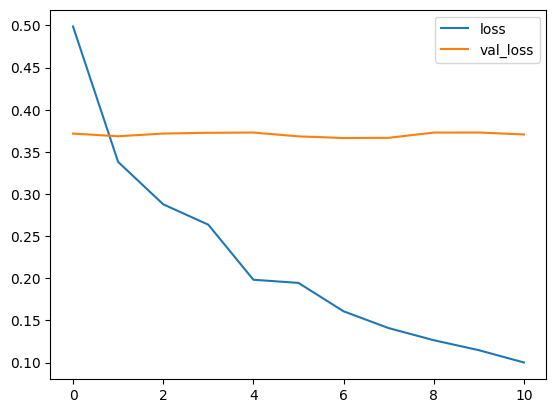

In [114]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()

In [115]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [116]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode="categorical", image_size=(224, 224), batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode="categorical", image_size=(224, 224), batch_size=32)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [117]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [118]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model4 = tf.keras.Model(inputs, outputs)

model4.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history = model4.fit(train_data, epochs=10, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data))

for layers in base_model.layers[-50:]:
    layer.trainable = True

model4.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0001), metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('checkpoints/best_model.keras', save_best_only=True, save_freq="epoch", monitor="val_loss", mode = "min", verbose=1, save_weights_only=False)

history = model4.fit(train_data, epochs=20, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), initial_epoch=history.epoch[-1], callbacks=[checkpoint_callback])

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.6284 - loss: 1.2405 - val_accuracy: 0.8900 - val_loss: 0.4035
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8530 - loss: 0.4893 - val_accuracy: 0.9000 - val_loss: 0.3274
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8750 - loss: 0.4078 - val_accuracy: 0.9080 - val_loss: 0.3007
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8887 - loss: 0.3548 - val_accuracy: 0.9120 - val_loss: 0.2845
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8979 - loss: 0.3294 - val_accuracy: 0.9140 - val_loss: 0.2749
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9162 - loss: 0.2986 - val_accuracy: 0.9148 - val_loss: 0.2676
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9163 - loss: 0.2802 - val_accuracy: 0.9180 - val_loss: 0.2627
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9222 - loss: 0.2641 - val_ac

In [120]:
best_model = tf.keras.models.load_model("checkpoints/best_model.keras")

In [121]:
model4.evaluate(test_data, steps=len(test_data))

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9219 - loss: 0.2648


[0.25087085366249084, 0.921999990940094]

In [122]:
best_model.evaluate(test_data, steps=len(test_data))

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9185 - loss: 0.2651


[0.2508710026741028, 0.921999990940094]

<Axes: >

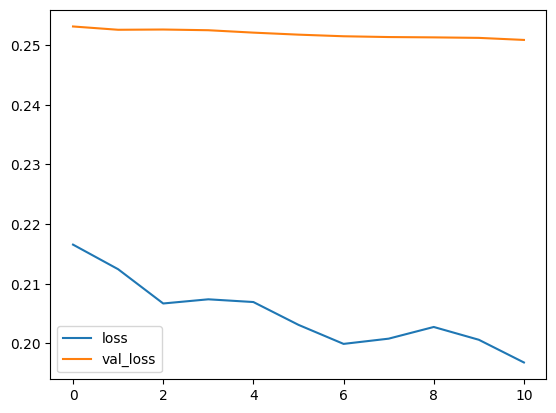

In [123]:
pd.DataFrame({"loss": history.history["loss"], "val_loss": history.history["val_loss"]}).plot()